https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Predict whether the cancer is benign or malignant

In [85]:
# Pandas for DataFrames
import pandas as pd

# NumPy for numerical computing
import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

In [63]:
# Importing the data 
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']  ## not taking ID column
df = pd.read_csv(r"C:\Users\RD\Desktop\Practice\ML\Kaggle_Brest Cancer\data.csv", usecols = cols)
data = df.copy()

In [17]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Summary Statistics

In [18]:
# Dataframe dimensions
data.shape

(569, 31)

In [19]:
# Display first 5 rows of df
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Column datatypes
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [21]:
# Loop through categorical feature names and print each one
for feature in data.dtypes[data.dtypes == 'object'].index:
    print(feature)

diagnosis


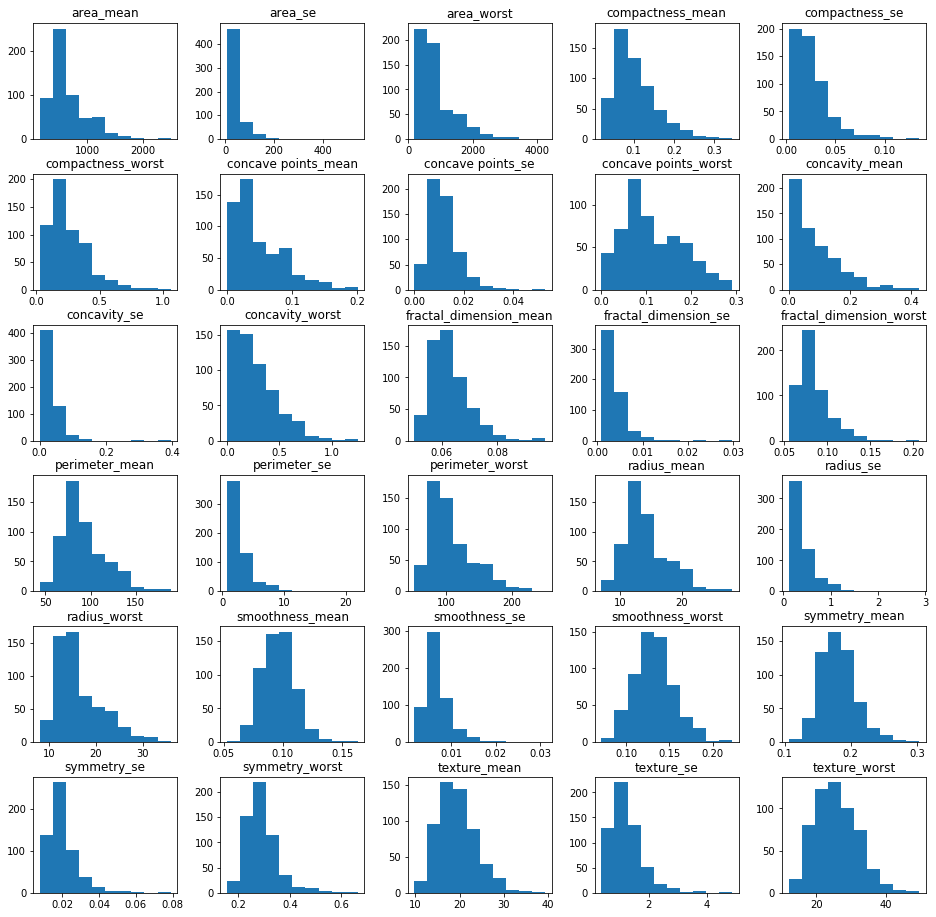

In [22]:
# Plot histogram grid
data.hist(figsize = (16,16),grid = False)

# Clear the text "residue"
plt.show()

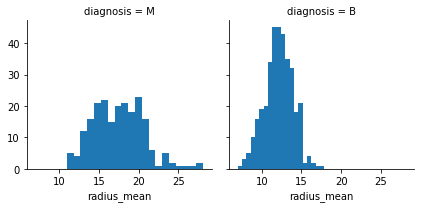

In [24]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'radius_mean',bins=20)
plt.show()

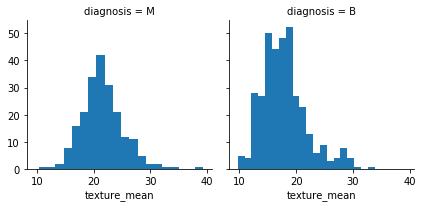

In [25]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'texture_mean',bins=20)
plt.show()

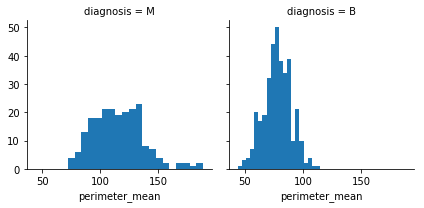

In [26]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'perimeter_mean',bins=20)
plt.show()

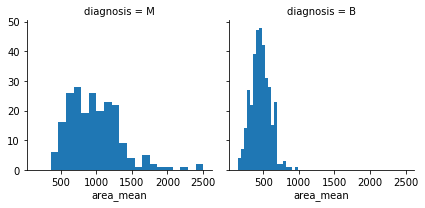

In [27]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'area_mean',bins=20)
plt.show()

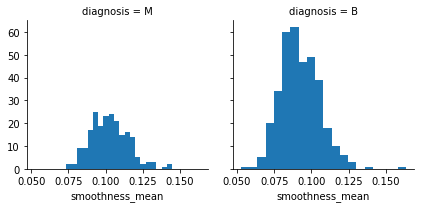

In [28]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'smoothness_mean',bins=20)
plt.show()

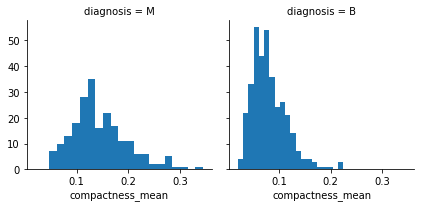

In [29]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'compactness_mean',bins=20)
plt.show()

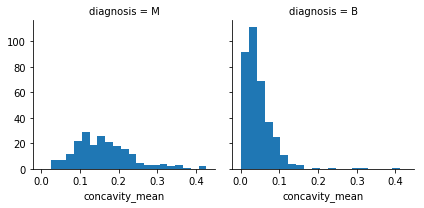

In [30]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'concavity_mean',bins=20)
plt.show()

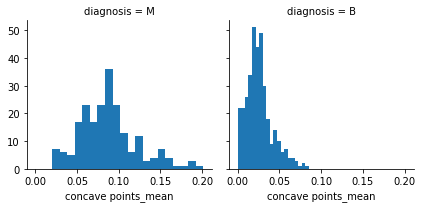

In [31]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'concave points_mean',bins=20)
plt.show()

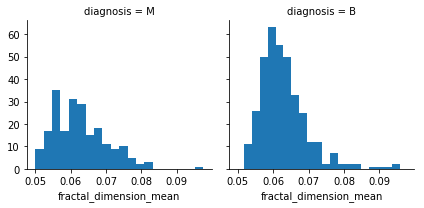

In [33]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'fractal_dimension_mean',bins=20)
plt.show()

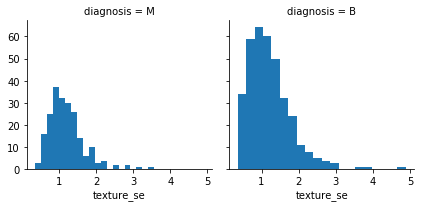

In [34]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'texture_se',bins=20)
plt.show()

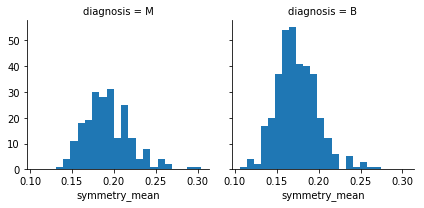

In [32]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'symmetry_mean',bins=20)
plt.show()

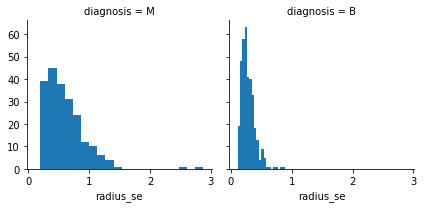

In [35]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'radius_se',bins=20)
plt.show()

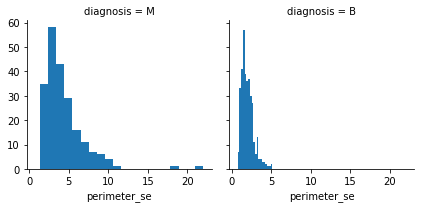

In [36]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'perimeter_se',bins=20)
plt.show()

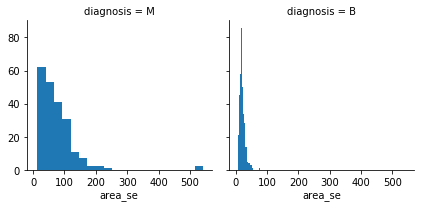

In [37]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'area_se',bins=20)
plt.show()

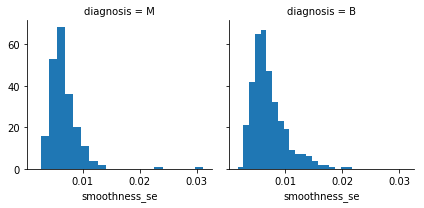

In [38]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'smoothness_se',bins=20)
plt.show()

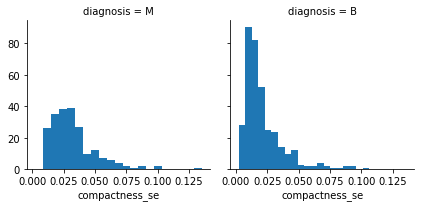

In [40]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'compactness_se',bins=20)
plt.show()

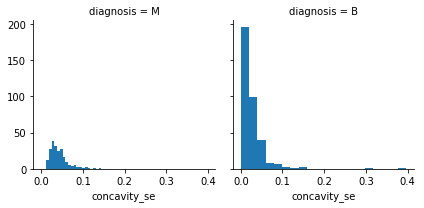

In [41]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'concavity_se',bins=20)
plt.show()

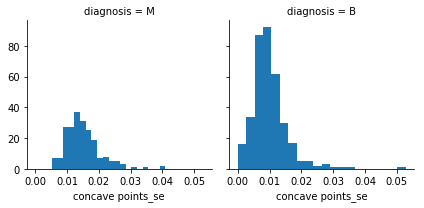

In [43]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'concave points_se',bins=20)
plt.show()

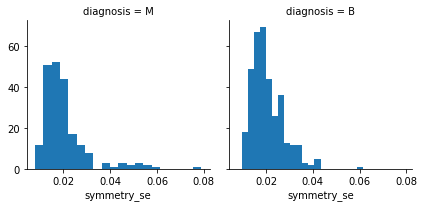

In [44]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'symmetry_se',bins=20)
plt.show()

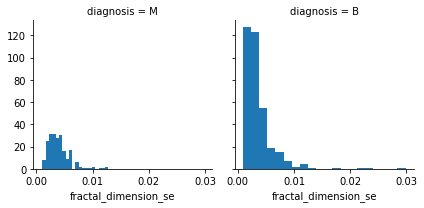

In [45]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'fractal_dimension_se',bins=20)
plt.show()

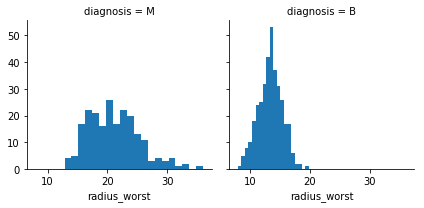

In [46]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'radius_worst',bins=20)
plt.show()

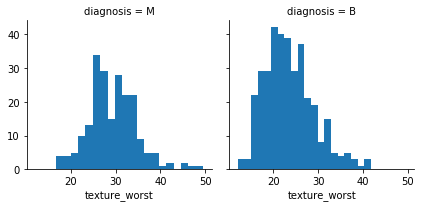

In [47]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'texture_worst',bins=20)
plt.show()

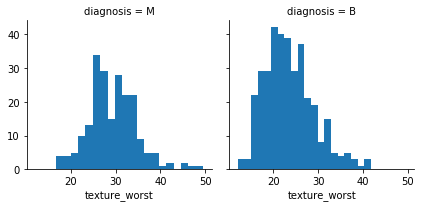

In [48]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'texture_worst',bins=20)
plt.show()

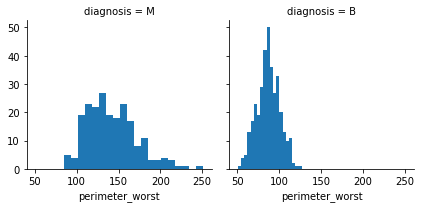

In [49]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'perimeter_worst',bins=20)
plt.show()

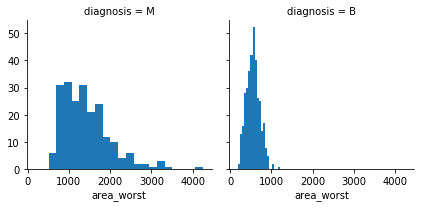

In [50]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'area_worst',bins=20)
plt.show()

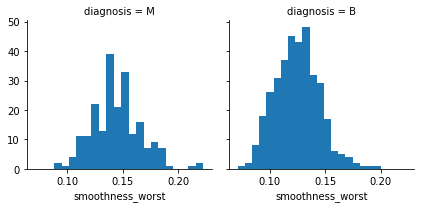

In [51]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'smoothness_worst',bins=20)
plt.show()

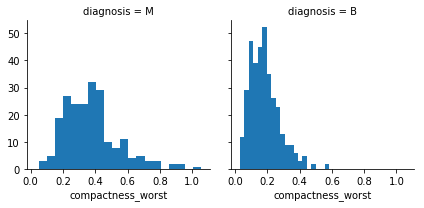

In [52]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'compactness_worst',bins=20)
plt.show()

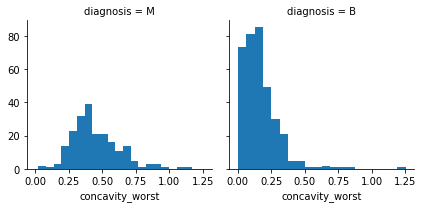

In [53]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'concavity_worst',bins=20)
plt.show()

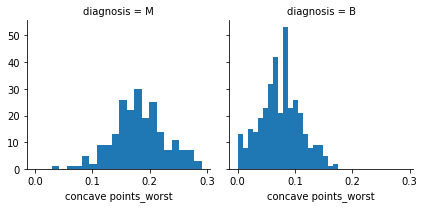

In [54]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'concave points_worst',bins=20)
plt.show()

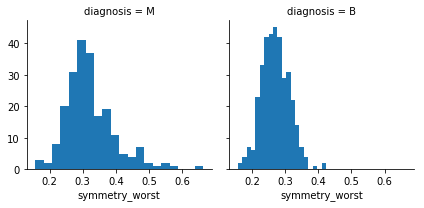

In [55]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'symmetry_worst',bins=20)
plt.show()

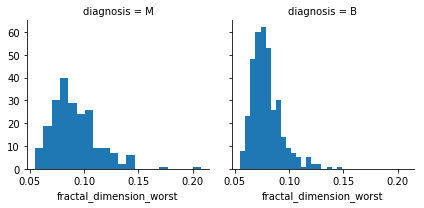

In [56]:
d = sns.FacetGrid(data,col='diagnosis')
d.map(plt.hist,'fractal_dimension_worst',bins=20)
plt.show()

In [59]:
# Drop duplicates
data.drop_duplicates()
print( data.shape )

(569, 31)


Data has no duplicate rows

#### Checking for null values

In [62]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Data has no null values

### Decision Tree

In [75]:
# Splitting of data into X and y 
X = data.drop('diagnosis',axis=1)
y = data[['diagnosis']]

In [76]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [78]:
# Checking dimension
y.shape, X.shape

((569, 1), (569, 30))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 100)

In [83]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Classifying new Observations

In [84]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B'],
      dtype=object)

### Confusion Matrix

In [88]:
c = confusion_matrix(y_test, y_pred)
c

array([[87,  3],
       [ 5, 48]], dtype=int64)

### Accuracy

In [90]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

94.4055944055944

##### Overall Accuracy = 94.40%